In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import functions


In [18]:
path_tl = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2024Nov_output/TL/'
location = 'mustang'

lc1 = pd.read_csv(path_tl+f'{location}_monthly_sum_elevation_Qstl_landcover1.csv')
lc2 = pd.read_csv(path_tl+f'{location}_monthly_sum_elevation_Qstl_landcover2.csv')
lc3 = pd.read_csv(path_tl+f'{location}_monthly_sum_elevation_Qstl_landcover3.csv')
lc4 = pd.read_csv(path_tl+f'{location}_monthly_sum_elevation_Qstl_landcover4.csv')

In [19]:
# Define the start and end dates for the filter
start_date = "1990-07-31"
end_date = "2021-06-30"

# Convert column D to datetime if it isn't already


# Filter the DataFrame for the specified date range
def prepare_dfcount_for_plot(dfcount):
    dfcount['D'] = pd.to_datetime(dfcount['D'])
    dfcount = dfcount[(dfcount['D'] >= start_date) & (dfcount['D'] <= end_date)]

    dfcount = dfcount.rename(columns={'D_year': 'year', 'D_month': 'month'})
    dfcount = dfcount.drop('D', axis = 1)
    dfcount['date_id'] = dfcount['year'].astype(str)+ "_" + dfcount['month'].astype(str)
    melted = pd.melt(dfcount, id_vars=['date_id', 'year', 'month'], var_name='elevation', value_name='dfs_count')
    
    # melted = pd.melt(dfcount, id_vars=['date_id'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # create unique id for elevation and month for merging
    melted['elevation'] = melted['elevation'].astype(int)
    melted['id'] = melted.index.astype(str)+ "_" + melted['elevation'].astype(str) + "_" + melted['year'].astype(str)+ "_" + melted['month'].astype(str)
    
    melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 




In [20]:
def prepare_for_boxplots(df, value_name, new_name):
    df['date_id'] = df['year'].astype(str)+ "_" + df['month'].astype(str)
        
    melted = pd.melt(df, id_vars=['date_id', 'month', 'year', 'land_cover'], var_name='elevation', value_name=value_name)
    melted = melted.rename(columns={value_name: new_name})

    
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    melted = melted.sort_values('elevation_bin')
    melted['elevation'] = melted['elevation'].astype(int)
    melted['id'] = melted.index.astype(str)+ "_" + melted['elevation'].astype(str) + "_" + melted['year'].astype(str)+ "_" + melted['month'].astype(str)
    melted = melted.sort_values('elevation_bin')

    return melted


In [21]:
lc1_melted = prepare_for_boxplots(lc1, 'Qstl', 'Qstl1')
lc2_melted = prepare_for_boxplots(lc2, 'Qstl', 'Qstl2')
lc3_melted = prepare_for_boxplots(lc3, 'Qstl', 'Qstl3')
lc4_melted = prepare_for_boxplots(lc4, 'Qstl', 'Qstl4')


Text(0.5, 0.98, 'TL output')

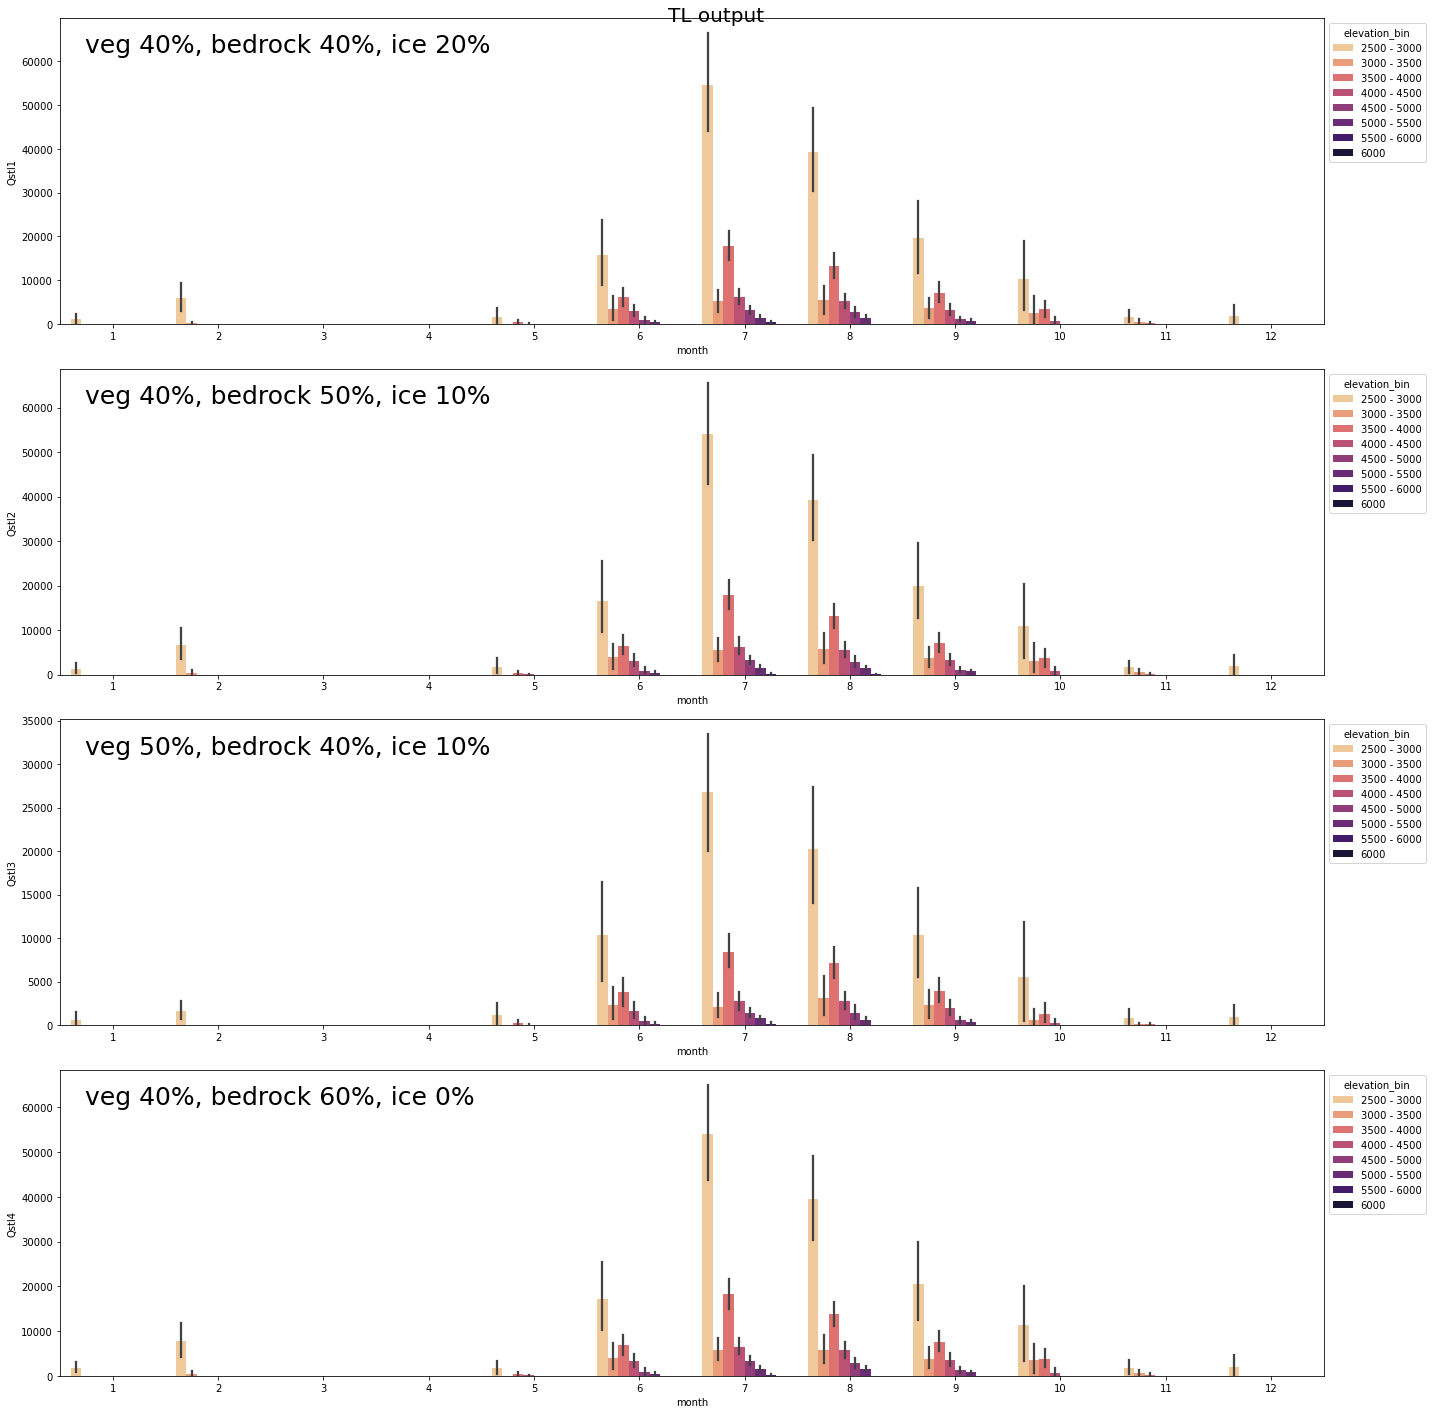

In [22]:
fig = plt.figure(figsize=(20, 20), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qstl1', hue = 'elevation_bin', data=lc1_melted, palette = 'magma_r') 
sns.barplot(ax = mosaic['b'], x='month', y='Qstl2', hue = 'elevation_bin', data=lc2_melted, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='Qstl3', hue = 'elevation_bin', data=lc3_melted, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='Qstl4', hue = 'elevation_bin', data=lc4_melted, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.02, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.02, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.02, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

fig.suptitle('TL output', fontsize = 20)

# in percentage of the 'ref' landcover 

In [23]:
tlQstl = lc1_melted.merge(lc2_melted[['Qstl2', 'id']], on='id') \
                     .merge(lc3_melted[['Qstl3', 'id']], on='id') \
                     .merge(lc4_melted[['Qstl4', 'id']], on='id')

tlQstl['Qstl1'] = tlQstl['Qstl1'].replace(0, np.nan)
tlQstl['Qstl2'] = tlQstl['Qstl2'].replace(0, np.nan)
tlQstl['Qstl3'] = tlQstl['Qstl3'].replace(0, np.nan)
tlQstl['Qstl4'] = tlQstl['Qstl4'].replace(0, np.nan)

for col in ['Qstl1', 'Qstl2', 'Qstl3']:
    tlQstl[f'{col}_percent'] = (tlQstl[col] / tlQstl['Qstl4']) * 100



Text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%')

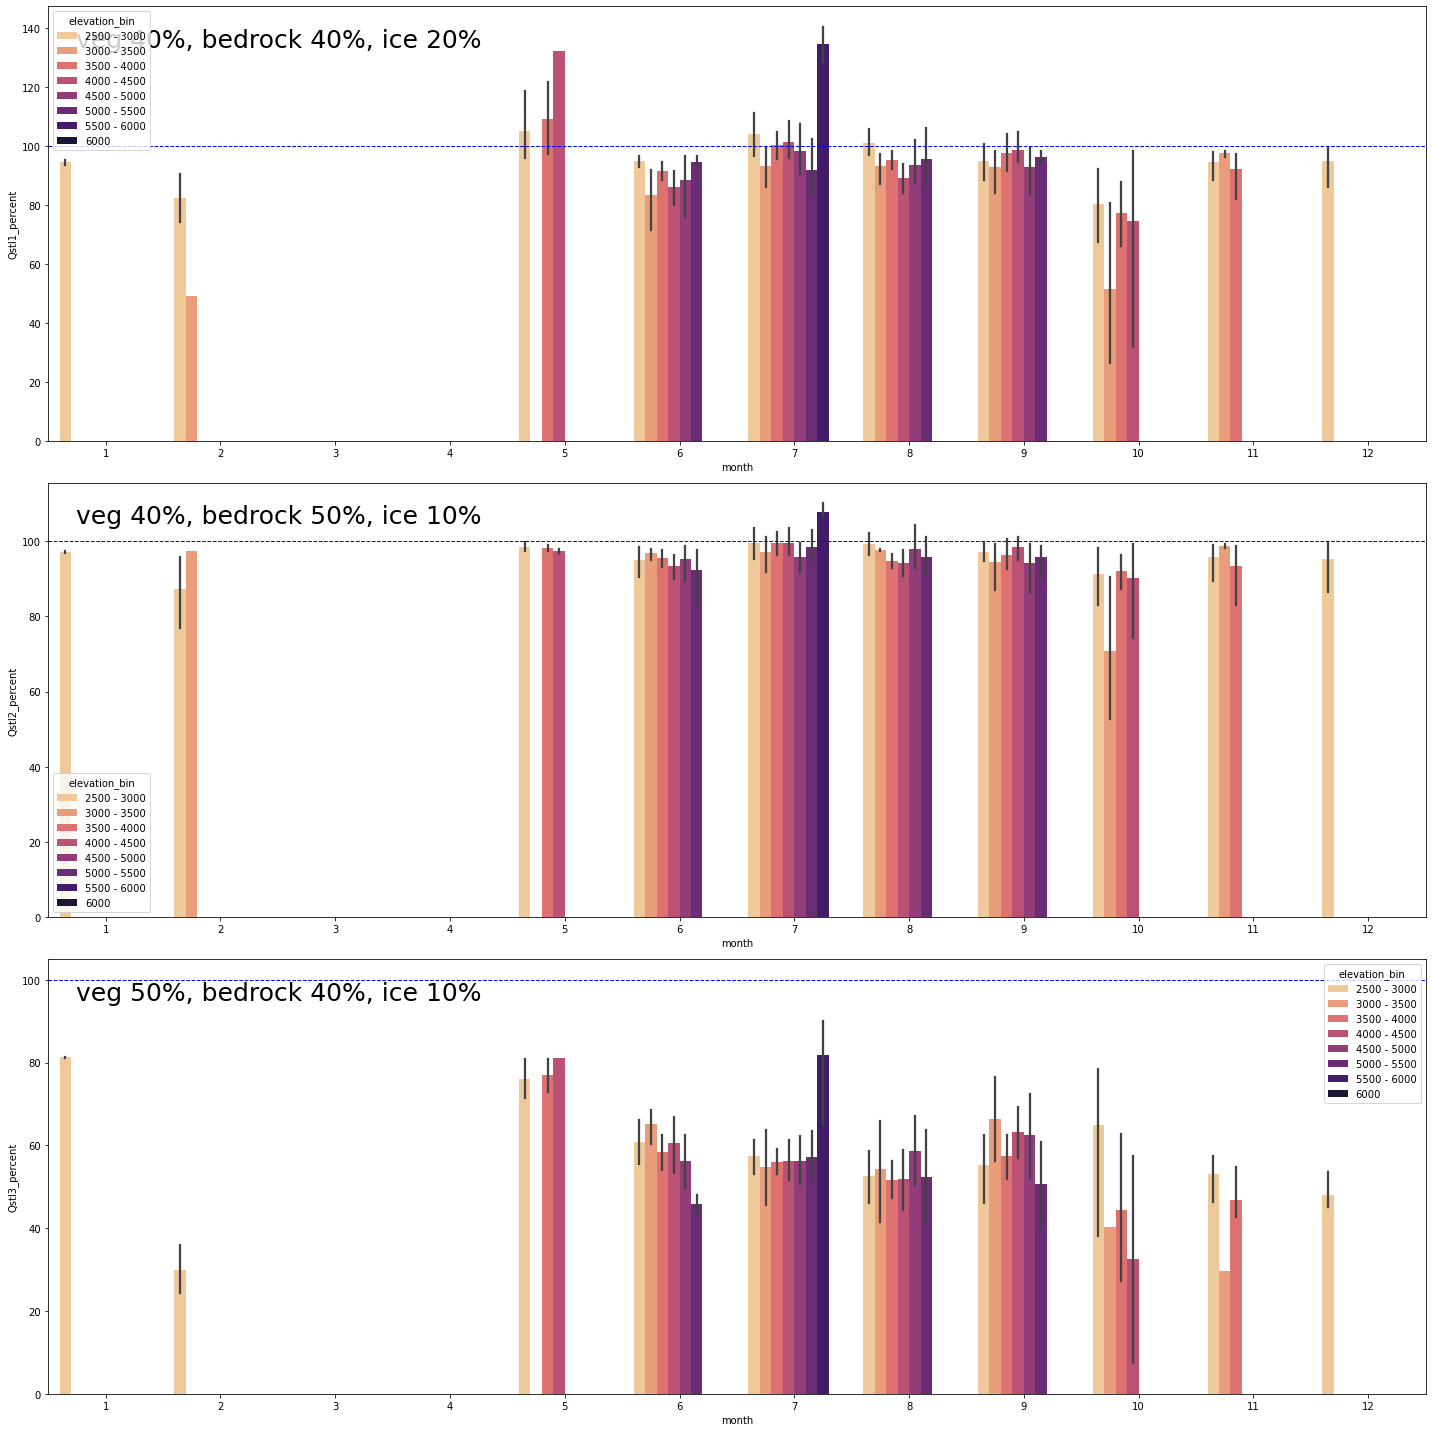

In [24]:
fig = plt.figure(figsize=(20, 20), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Qstl1_percent', hue = 'elevation_bin', data=tlQstl, palette = 'magma_r') 
sns.barplot(ax = mosaic['b'], x='month', y='Qstl2_percent', hue = 'elevation_bin', data=tlQstl, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='Qstl3_percent', hue = 'elevation_bin', data=tlQstl, palette = 'magma_r')

# Add horizontal lines at y=100
mosaic['a'].axhline(y=100, color='blue', linestyle='--', linewidth=1)
mosaic['b'].axhline(y=100, color='blue', linestyle='--', linewidth=1)
mosaic['c'].axhline(y=100, color='blue', linestyle='--', linewidth=1)


# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.02, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.02, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')


Text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%')

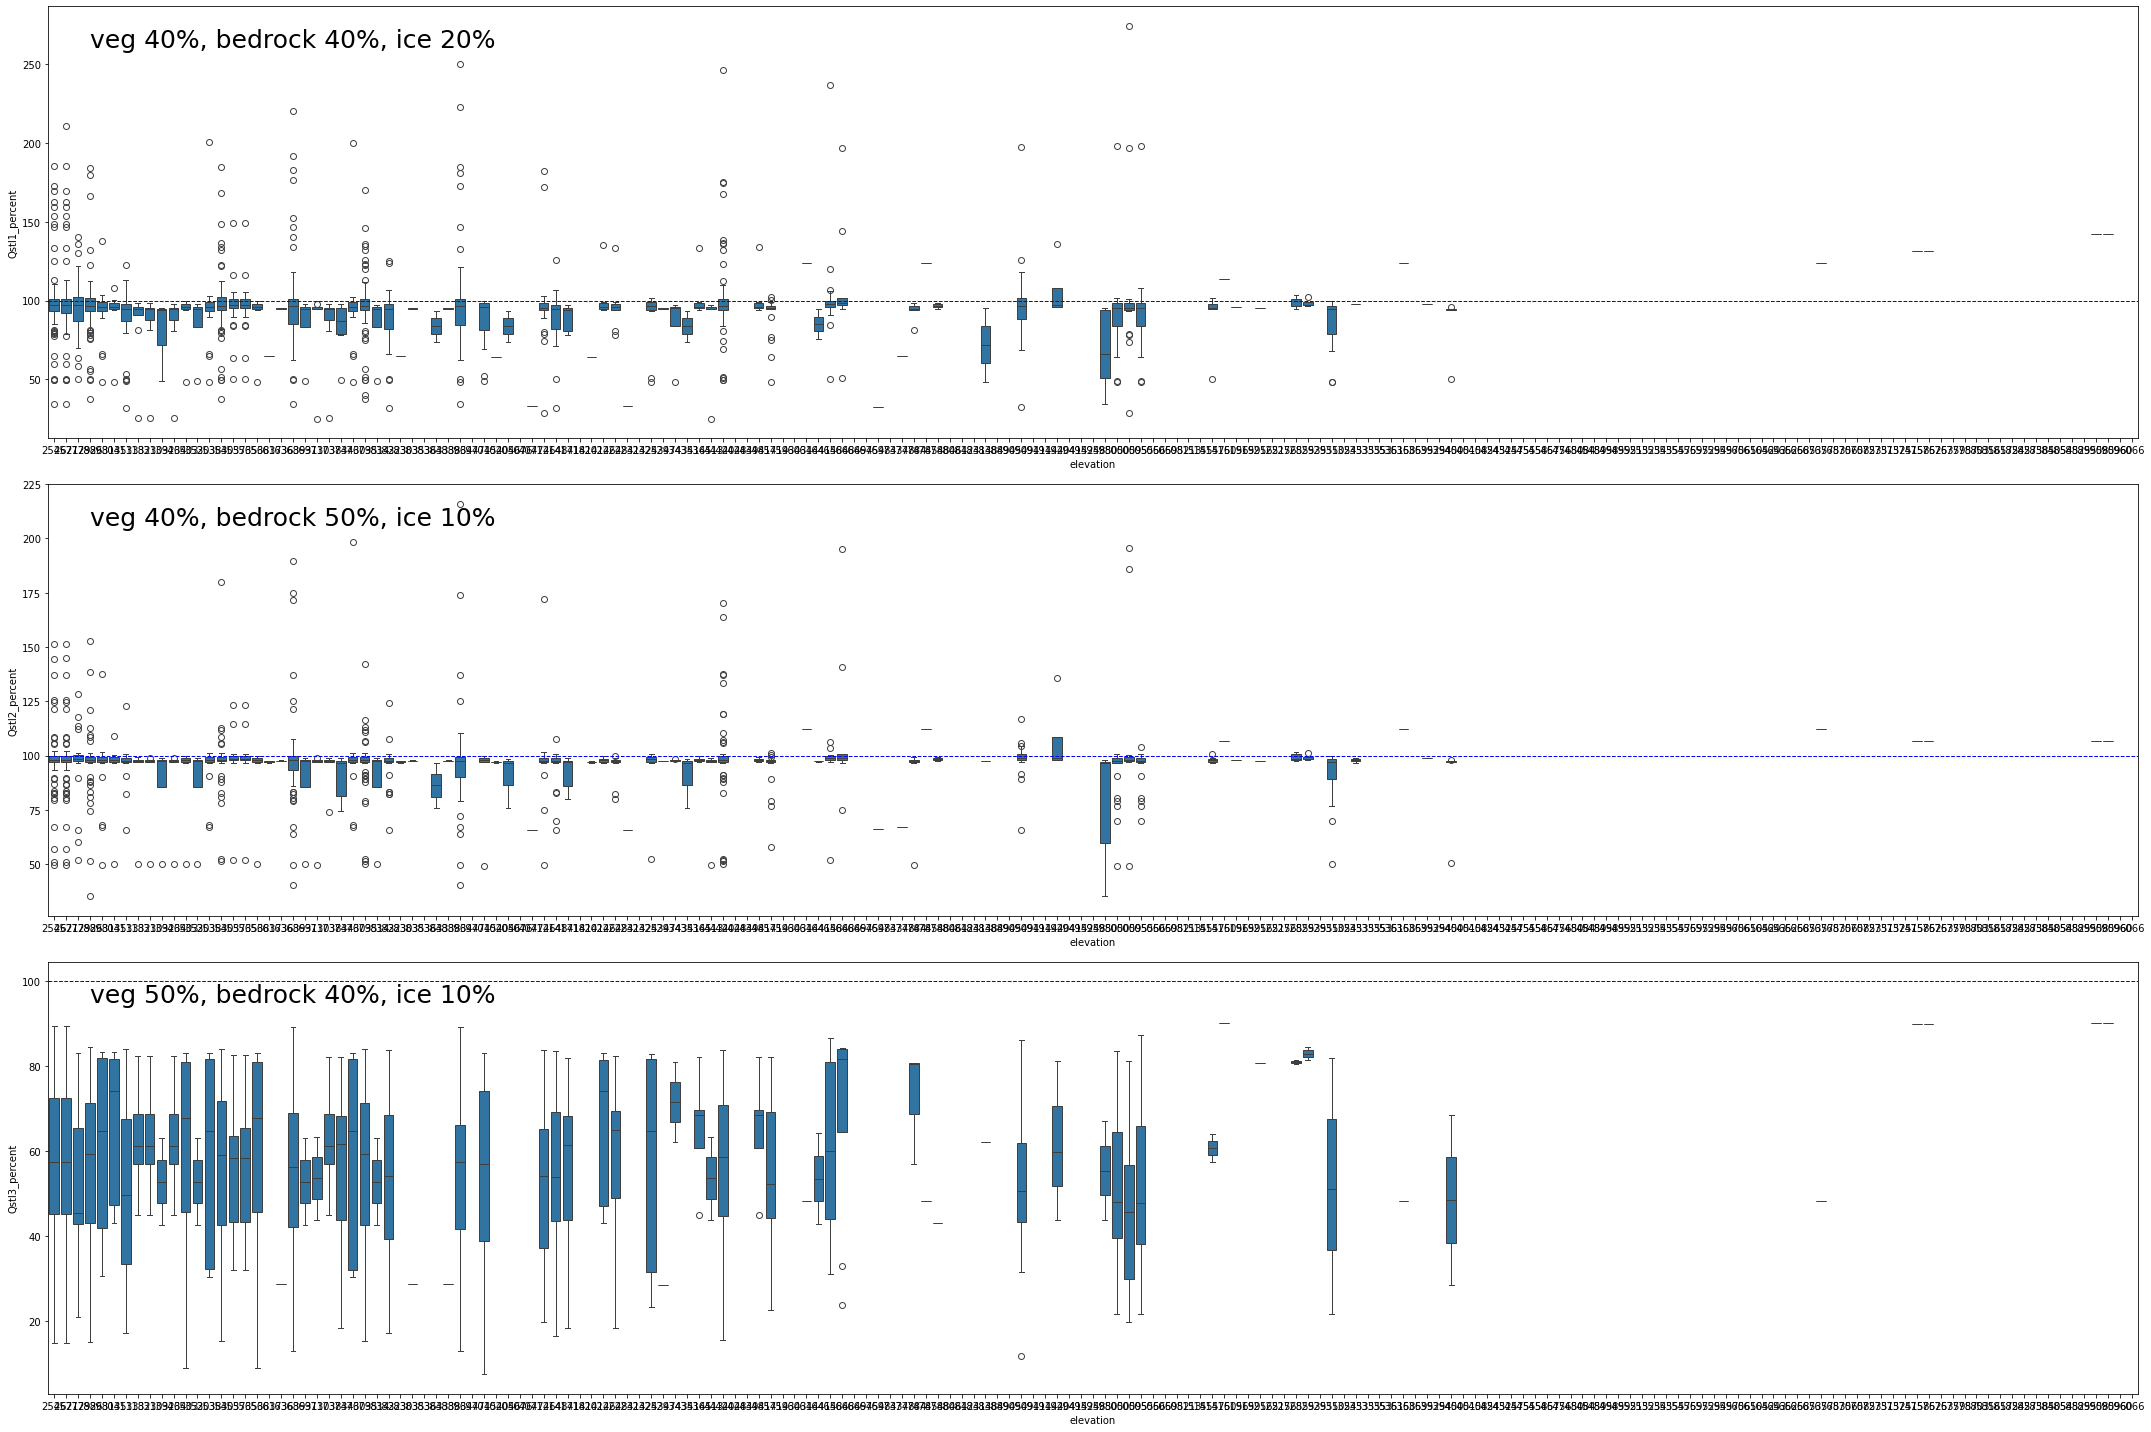

In [25]:
fig = plt.figure(figsize=(30, 20), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ''')


sns.boxplot(ax = mosaic['a'],  data=tlQstl, x='elevation', y='Qstl1_percent')#, hue = 'month', palette = 'magma_r') 
sns.boxplot(ax = mosaic['b'],  data=tlQstl, x='elevation', y='Qstl2_percent')#, hue = 'month', palette = 'magma_r')
sns.boxplot(ax = mosaic['c'],  data=tlQstl, x='elevation', y='Qstl3_percent')#, hue = 'month', palette = 'magma_r')

# Add horizontal lines at y=100
mosaic['a'].axhline(y=100, color='blue', linestyle='--', linewidth=1)
mosaic['b'].axhline(y=100, color='blue', linestyle='--', linewidth=1)
mosaic['c'].axhline(y=100, color='blue', linestyle='--', linewidth=1)


# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.02, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.02, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')


# sl situation 

In [39]:
path_tl = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2024Nov_output/'
location = 'mustang'
method = 'daily'
percentile = '60percent'

lc1 = pd.read_csv(path_tl+f'SL_{method}/output_{percentile}/{location}_monthly_sum_elevation_Q100_landcover1_{percentile}.csv')
lc2 = pd.read_csv(path_tl+f'SL_{method}/output_{percentile}/{location}_monthly_sum_elevation_Q100_landcover2_{percentile}.csv')
lc3 = pd.read_csv(path_tl+f'SL_{method}/output_{percentile}/{location}_monthly_sum_elevation_Q100_landcover3_{percentile}.csv')
lc4 = pd.read_csv(path_tl+f'SL_{method}/output_{percentile}/{location}_monthly_sum_elevation_Q100_landcover4_{percentile}.csv')

In [40]:
lc1_melted = prepare_for_boxplots(lc1, 'Q100', 'Q1001')
lc2_melted = prepare_for_boxplots(lc2, 'Q100', 'Q1002')
lc3_melted = prepare_for_boxplots(lc3, 'Q100', 'Q1003')
lc4_melted = prepare_for_boxplots(lc4, 'Q100', 'Q1004')


slQ100 = lc1_melted.merge(lc2_melted[['Q1002', 'id']], on='id') \
                     .merge(lc3_melted[['Q1003', 'id']], on='id') \
                     .merge(lc4_melted[['Q1004', 'id']], on='id')

slQ100['Qstl1'] = slQ100['Q1001'].replace(0, np.nan)
slQ100['Qstl2'] = slQ100['Q1002'].replace(0, np.nan)
slQ100['Qstl3'] = slQ100['Q1003'].replace(0, np.nan)
slQ100['Qstl4'] = slQ100['Q1004'].replace(0, np.nan)


Text(0.5, 0.98, 'SL output, sediemnt input daily, 60percent')

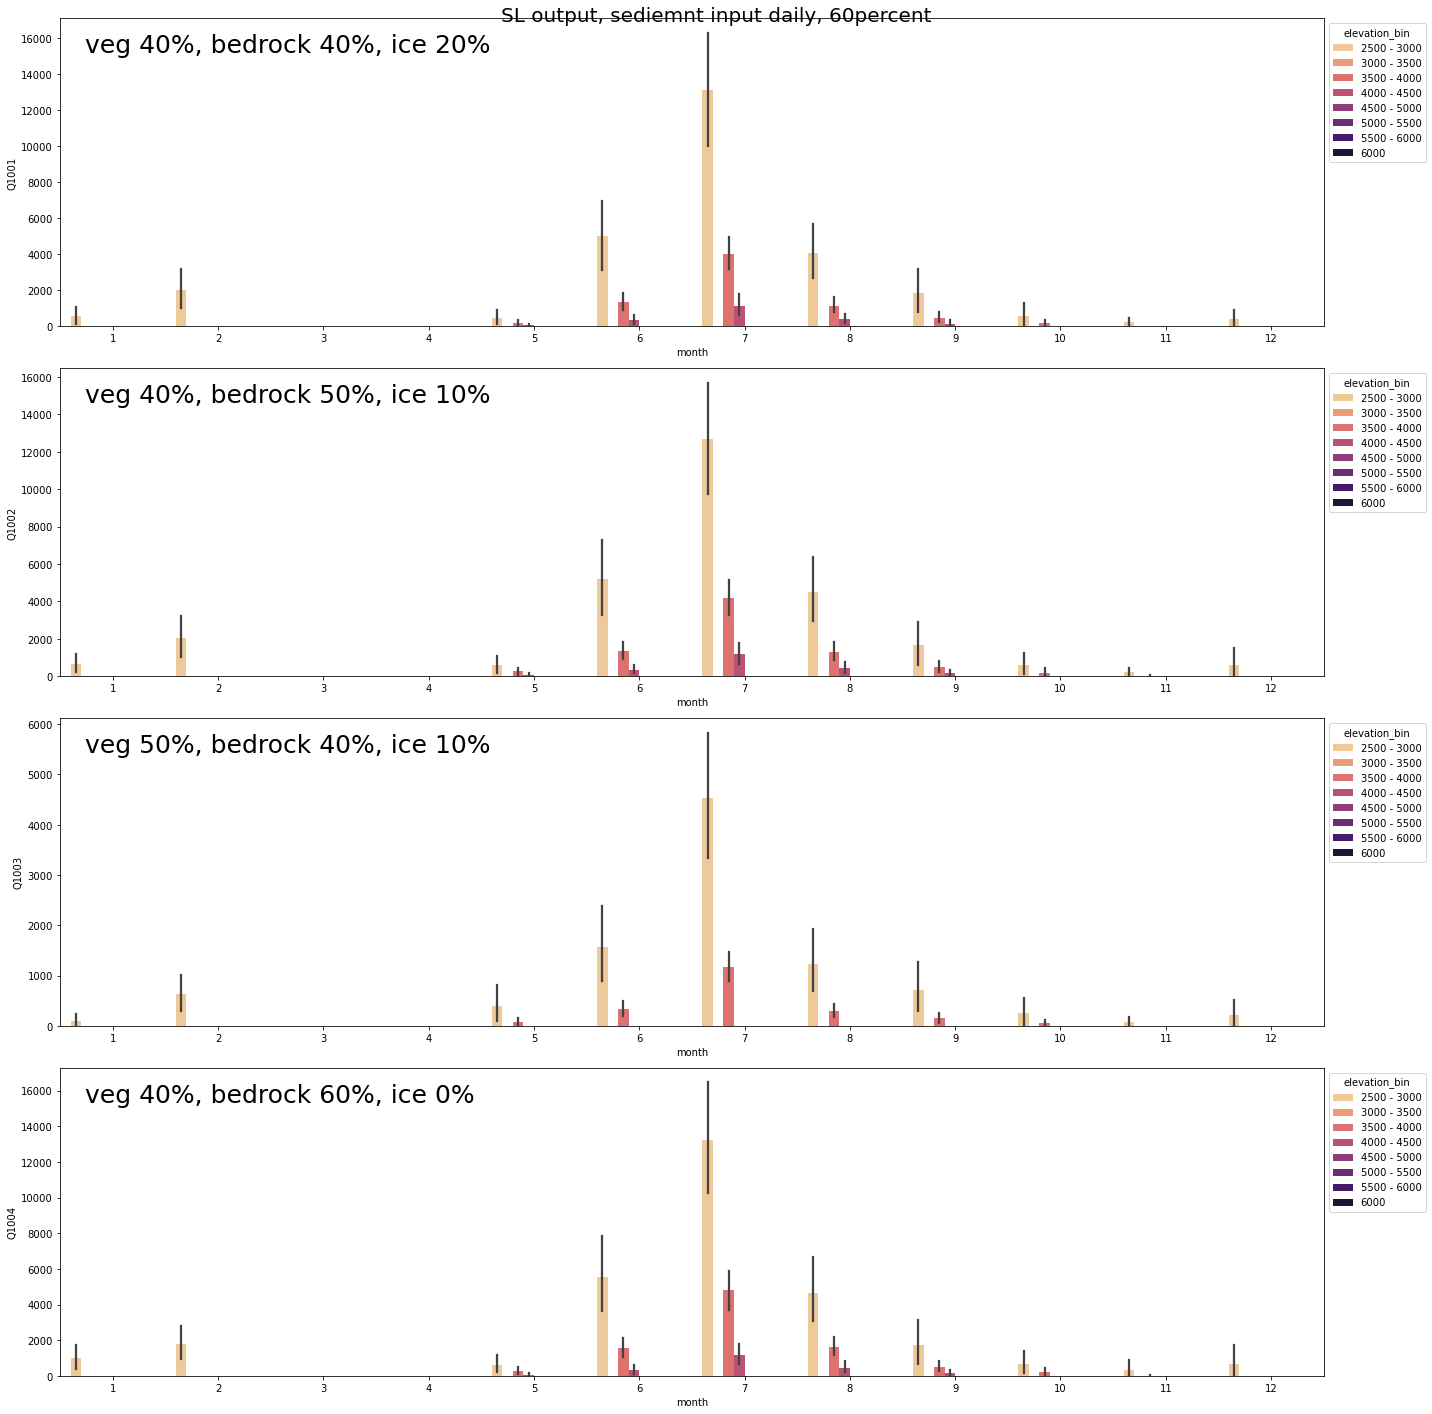

In [41]:
fig = plt.figure(figsize=(20, 20), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.barplot(ax = mosaic['a'], x='month', y='Q1001', hue = 'elevation_bin', data=slQ100, palette = 'magma_r') 
sns.barplot(ax = mosaic['b'], x='month', y='Q1002', hue = 'elevation_bin', data=slQ100, palette = 'magma_r')
sns.barplot(ax = mosaic['c'], x='month', y='Q1003', hue = 'elevation_bin', data=slQ100, palette = 'magma_r')
sns.barplot(ax = mosaic['d'], x='month', y='Q1004', hue = 'elevation_bin', data=slQ100, palette = 'magma_r')


sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['b'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['c'], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(mosaic['d'], "upper left", bbox_to_anchor=(1, 1))

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.02, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.02, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.02, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.02, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

fig.suptitle(f'SL output, sediemnt input {method}, {percentile}', fontsize = 20)